##### __Importing Libraries & Data Load__

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

In [28]:
### Define the path to the Excel file

file_path = r"C:\Users\user\Downloads\Customer_Churn_Analysis.xlsx"

# Define the sheet name to read data from

sheet_name = 'vw_Customer_churn'

# Read the data from the specified sheet into a pandas 

data = pd.read_excel(file_path, sheet_name=sheet_name)

In [29]:
# Display the first few rows of the fetched data
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11596-KAR,Female,40,No,Karnataka,15,11,Deal 4,Yes,No,...,Bank Withdrawal,49.200001,571.150024,0.0,80,114.959999,766.109985,Stayed,Others,Others
1,11604-HAR,Female,38,Yes,Haryana,4,8,NaN,Yes,Yes,...,Bank Withdrawal,104.400002,6721.600098,0.0,0,892.799988,7614.399902,Stayed,Others,Others
2,11616-TAM,Male,26,No,Tamil Nadu,6,2,NaN,Yes,Yes,...,Bank Withdrawal,68.699997,1416.199951,0.0,0,650.000000,2066.199951,Stayed,Others,Others
3,11647-GUJ,Male,44,No,Gujarat,2,4,Deal 4,Yes,Yes,...,Bank Withdrawal,69.099998,1083.699951,0.0,0,223.839996,1307.540039,Stayed,Others,Others
4,11647-TAM,Male,81,No,Tamil Nadu,1,21,NaN,Yes,Yes,...,Bank Withdrawal,93.750000,5625.549805,0.0,0,125.970001,5751.520020,Stayed,Others,Others


#### __Data Preprocessing__

In [30]:
# Drop columns that won't be used for prediction

data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


# List of columns to be label encoded

columns_to_encode = ['Payment_Method','Unlimited_Data',
'Total_Refunds','Streaming_TV','Streaming_Movies','Streaming_Music','Multiple_Lines', 'Device_Protection_Plan',
'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service',
'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Premium_Support', 'Contract', 'Paperless_Billing'
]


# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### __Train Random Forest Model__

In [31]:
# Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### __Evaluate Model__

Confusion Matrix:
[[798  65]
 [121 218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       863
           1       0.77      0.64      0.70       339

    accuracy                           0.85      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.85      0.84      1202



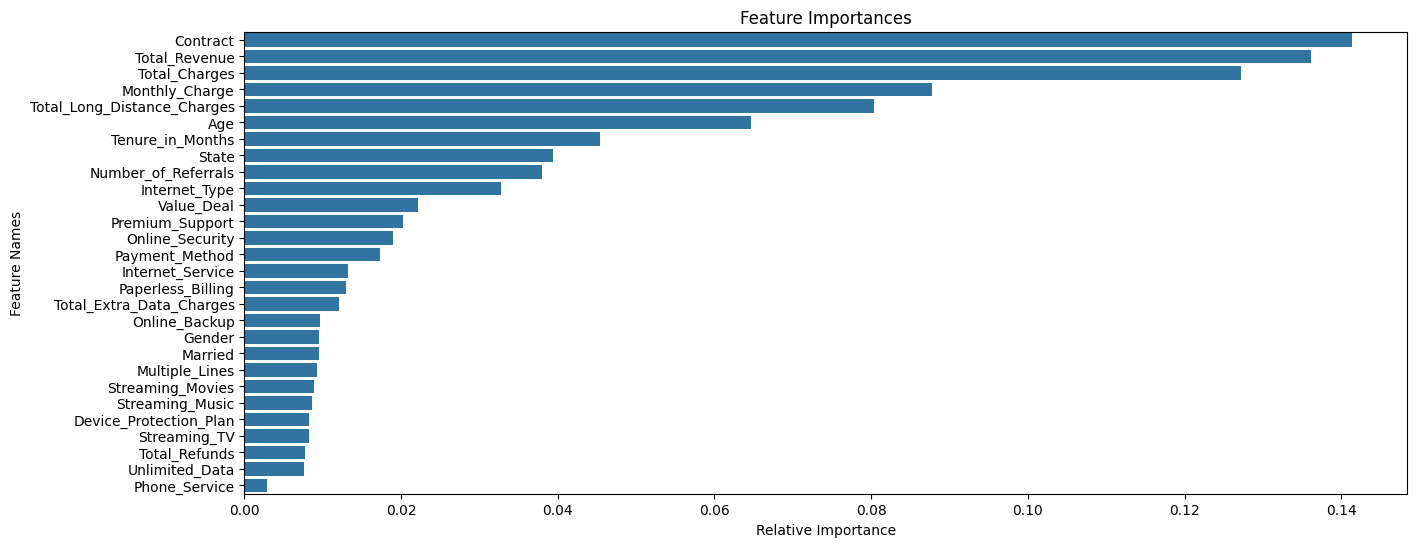

In [32]:
# Make predictions

y_pred = rf_model.predict(X_test)

# Evaluate the model

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

#### __Use Model for Prediction on New Data__

In [41]:
# Define the path to the Joiner Data Excel file

file_path = r"C:\Users\user\Downloads\Customer_Churn_Analysis.xlsx"


# Define the sheet name to read data from

sheet_name = 'vw_Customer_Join'

 
# Read the data from the specified sheet into a pandas DataFrame

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

 
# Display the first few rows of the fetched data

print(new_data.head())

 
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 
# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']


# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])


# Make predictions

new_predictions = rf_model.predict(new_data)


# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions


# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


# Save the results

original_data.to_excel(r"C:\Users\user\Downloads\Prediction.xlsx", index=False)

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11751-TAM  Female   18      No      Tamil Nadu                    5   
1   13666-UTT    Male   57     Yes     Uttarakhand                   15   
2   13744-AND  Female   41     Yes  Andhra Pradesh                    8   
3   13823-TEL  Female   31     Yes       Telangana                    1   
4   13946-HAR  Female   41     Yes         Haryana                    1   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                16        NaN           Yes             No  ...   
2                 3     Deal 5           Yes             No  ...   
3                28     Deal 5            No             No  ...   
4                 3     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Wi